# All volatility indicators

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import useful_functions as uf
import classification_report_generator as crg
from ta.volatility import AverageTrueRange
from ta.volatility import BollingerBands
from ta.volatility import DonchianChannel
from ta.volatility import KeltnerChannel
from ta.volatility import UlcerIndex

In [62]:
df = pd.read_csv("../data/BTCUSDT-hour-target.csv")
p = "" #change to 'volatility_' to have all indicators with prefix 'volatility_'

In [63]:
# ATR
atr = AverageTrueRange(df["high"], df["low"], df["close"], 14)
df[p + "atr_14"] = atr.average_true_range()
df[p + "atr_o_close"] = list(map(lambda a, c: a/c, df[p + "atr_14"], df.close))

In [64]:
# BB
bb = BollingerBands(df["close"], window=10, window_dev=2)
df[p + "bb_wband_10"] = bb.bollinger_wband()

bb = BollingerBands(df["close"], window=100, window_dev=2)
df[p + "bb_pband_100"] = bb.bollinger_pband()

bb = BollingerBands(df["close"], window=200, window_dev=2)
df[p + "bb_wband_200"] = bb.bollinger_wband()

bb = BollingerBands(df["close"], window=20, window_dev=2)
df[p + "bb_hband_o_close"] = list(map(lambda l, c: (l-c)/c, bb.bollinger_hband(), df.close))

In [65]:
# DC
dc = DonchianChannel(df.high, df.low, df.close, window=50)
df[p + "dc_pband_50"] = dc.donchian_channel_pband()
dc = DonchianChannel(df.high, df.low, df.close, window=10)
df[p + "dc_wband_10"] = dc.donchian_channel_wband()

In [66]:
# KC
kc = KeltnerChannel(df.high, df.low, df.close, window=50)
df[p + "pband_50"] = kc.keltner_channel_pband()
kc = KeltnerChannel(df.high, df.low, df.close, window=20)
df[p + "wband_20"] = kc.keltner_channel_wband()

In [67]:
# UI
ui = UlcerIndex(df.close, window=30)
df[p + "ui_30"] = ui.ulcer_index()

In [68]:
df

,timestamp,open,high,low,close,volume,close_time,quote_av,trades,tb_base_av,...,atr_o_close,bb_wband_10,bb_pband_100,bb_wband_200,bb_hband_o_close,dc_pband_50,dc_wband_10,pband_50,wband_20,ui_30
0,2017-08-17 04:00:00.000,4261.48,4313.62,4261.32,4308.83,47.181009,1502945999999,2.023661e+05,171,35.160503,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.636138,NaN,NaN
1,2017-08-17 05:00:00.000,4308.83,4328.69,4291.37,4315.32,23.234916,1502949599999,1.003048e+05,102,21.448071,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.635331,NaN,NaN
2,2017-08-17 06:00:00.000,4330.29,4345.45,4309.37,4324.35,7.229691,1502953199999,3.128231e+04,36,4.802861,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.660209,NaN,NaN
3,2017-08-17 07:00:00.000,4316.62,4349.99,4287.41,4349.99,4.443249,1502956799999,1.924106e+04,25,2.602292,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.866626,NaN,NaN
4,2017-08-17 08:00:00.000,4333.32,4377.85,4333.32,4360.69,0.972807,1502960399999,4.239504e+03,28,0.814655,...,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.895730,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32531,2021-05-08 15:00:00,58947.47,58947.48,57472.95,57599.87,5851.539191,1620489599999,3.408746e+08,140494,2843.709612,...,0.012180,3.017848,0.693336,8.409544,0.029089,0.566189,3.358681,0.782144,2.276933,1.220620
32532,2021-05-08 16:00:00,57599.86,58500.00,57560.63,58381.14,4739.339671,1620493199999,2.753576e+08,137969,2172.633797,...,0.012307,2.569894,0.833198,8.364569,0.015681,0.750510,3.355372,1.326229,2.317539,1.127279
32533,2021-05-08 17:00:00,58381.14,59050.45,58139.91,58898.98,3815.391269,1620496799999,2.241230e+08,108370,1870.545827,...,0.012432,2.627245,0.918922,8.329081,0.007811,0.872681,3.352878,1.664419,2.389417,1.020275
32534,2021-05-08 18:00:00,58901.45,59251.04,58901.45,59060.57,2937.039406,1620500399999,1.734920e+08,105800,1551.876404,...,0.011938,2.740012,0.938006,8.288185,0.005351,0.910804,3.351711,1.768882,2.304459,1.006603


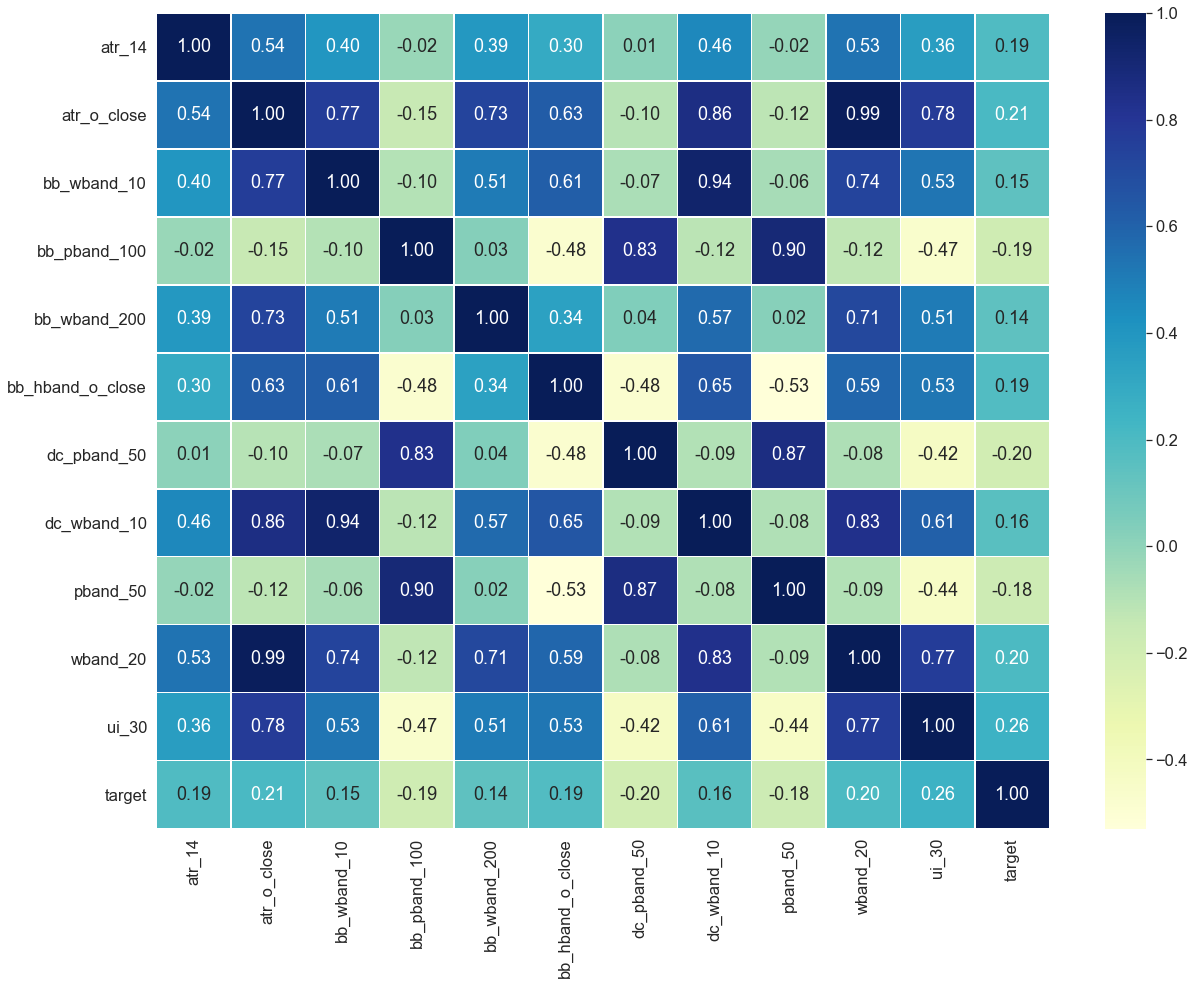

In [69]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df[list(indicators)].copy()
corr_matrix = d.corr()
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(corr_matrix,
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")

## Foward Testing

In [70]:
indicators = list(df.columns)[13:]
indicators.append("target")

d = df.copy()
d.dropna(inplace=True)
close = d["close"]
d = d[list(indicators)].copy()

X = d.drop(["target"], axis=1)
y = d["target"]

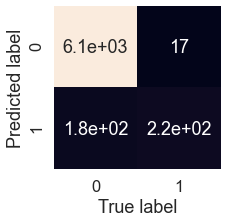

In [71]:
crg.plot_conf_matrix(X, y)

In [72]:
crg.generate_report(X, y)

{'precision': 0.18534825355374615,
 'recall': 0.22575757575757574,
 'f1': 0.105662683515055}

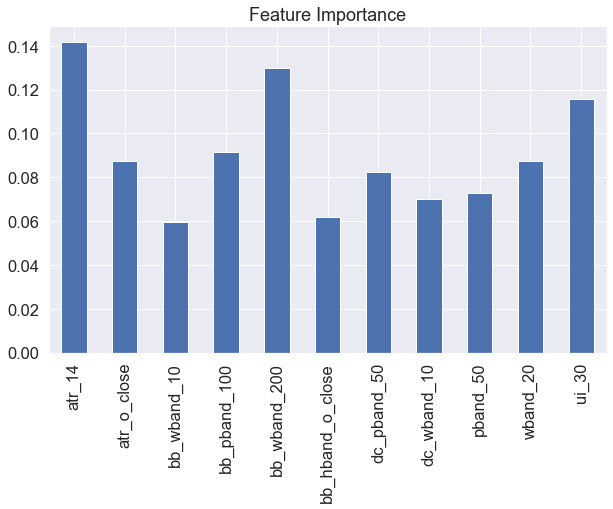

In [73]:
crg.feature_importance(X, y, plot=True)

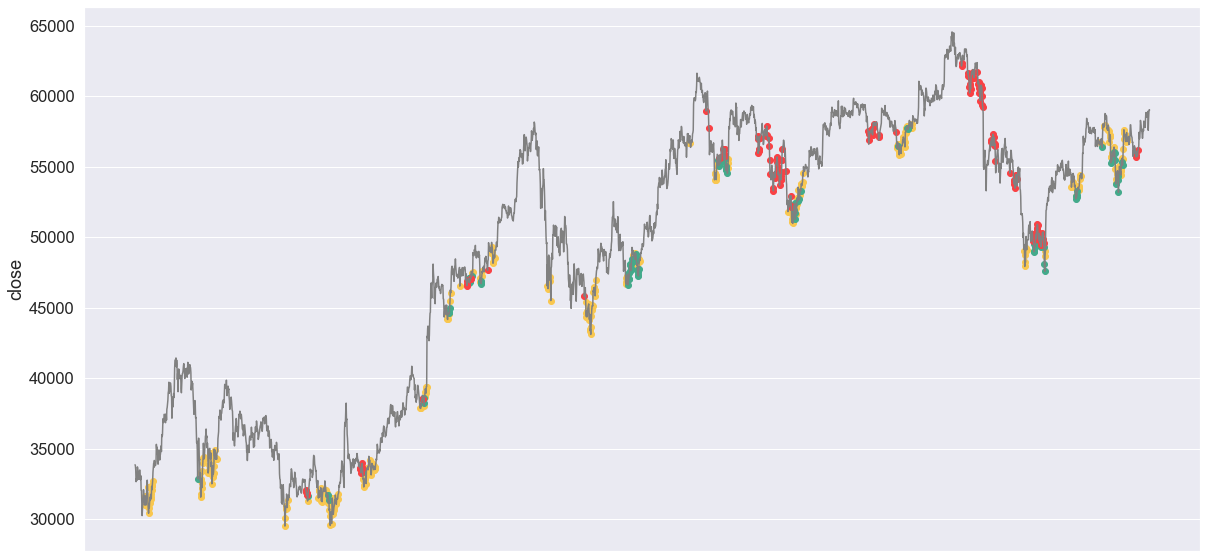

In [74]:
crg.forward_test(X, y, close, mistakes=True)